# Introduction
This is the ipython-notebook for apply BERT pre-trained model to injury records dataset.

We want to classify automatically injury records to its corresponding event category.

# Read processed data and label.

In this model, we just use the text data. The text are stored in data.txt, and corresponding event label are stored in label.txt



In [0]:
# read datasets.
data = []
with open("data.txt","r") as f:
  for line in f:
    data.append(line.rstrip())

In [0]:
# read labels.
label = []
with open("label.txt","r") as f:
  for line in f:
    label.append(line.rstrip())
classname = list(set(label))

In [87]:
print(classname)

['60', '73', '63', '12', '26', '44', '53', '62', '11', '31', '66', '72', '41', '55', '13', '70', '42', '23', '99', '32', '64', '51', '25', '24', '27', '78', '52', '71', '43']


# Load model and instantiate 
We should at first install ktrain package. It is a light wrapper for tensorflow.keras, making several model (including BERT) easier to use.

We have shuffled our dataset before,so here we just split the dataset to train set and test by cutting from the 10,000 sample, thus by around 2:1.

In [0]:
 !pip3 install ktrain

In [5]:
import ktrain
from ktrain import text

using Keras version: 2.2.4-tf


In [6]:
(x_train,  y_train), (x_test, y_test) , preproc = text.texts_from_array(x_train=data[0:100000], y_train=label[0:100000],
                                                                       x_test = data[100000:150000], y_test = label[100000:150000],
                                                                       class_names=classname,
                                                                       preprocess_mode='bert',
                                                                       maxlen=30,  # max_sentcence word length
                                                                       max_features=20000)

preprocessing train...
language: en


preprocessing test...
language: en


Have a look at the data

In [7]:
data[99999:100000]

['at work injure back heave lift back pain']

In [8]:
x_train[0].shape

(100000, 30)

Load and instantiate model with dataset.

In [9]:
model = text.text_classifier('bert', train_data=(x_train, y_train), preproc=preproc)
learner = ktrain.get_learner(model, train_data=(x_train, y_train), val_data = (x_test, y_test), batch_size=124)

Is Multi-Label? False
maxlen is 30
done.


# Train Model
In this part, we want find the best learning rate for our batch-size specified dataset. 

After finding it from the plot result, we start train the model until it converges on test dataset.

In [10]:
learner.lr_find()

simulating training for different learning rates... this may take a few moments...
Train on 100000 samples
Epoch 1/1024
100000/100000 [==============================] - 353s 4ms/sample - loss: 2.6476 - acc: 0.4110
Epoch 2/1024
 32984/100000 [========>.....................] - ETA: 3:52 - loss: 1.9944 - acc: 0.4474

done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


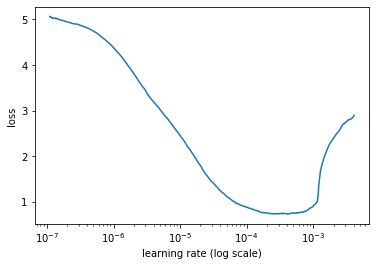

In [11]:
learner.lr_plot()

In [12]:
learner.fit_onecycle(1e-5, 12)



begin training using onecycle policy with max lr of 1e-05...
Train on 100000 samples, validate on 50000 samples
Epoch 1/12
100000/100000 [==============================] - 406s 4ms/sample - loss: 2.8487 - acc: 0.3520 - val_loss: 1.5941 - val_acc: 0.5763
Epoch 2/12
100000/100000 [==============================] - 403s 4ms/sample - loss: 1.1592 - acc: 0.7032 - val_loss: 0.7606 - val_acc: 0.7904
Epoch 3/12
100000/100000 [==============================] - 403s 4ms/sample - loss: 0.6988 - acc: 0.8014 - val_loss: 0.5732 - val_acc: 0.8303
Epoch 4/12
100000/100000 [==============================] - 404s 4ms/sample - loss: 0.5487 - acc: 0.8352 - val_loss: 0.4954 - val_acc: 0.8485
Epoch 5/12
100000/100000 [==============================] - 404s 4ms/sample - loss: 0.4643 - acc: 0.8563 - val_loss: 0.4566 - val_acc: 0.8579
Epoch 6/12
100000/100000 [==============================] - 405s 4ms/sample - loss: 0.4080 - acc: 0.8695 - val_loss: 0.4497 - val_acc: 0.8615
Epoch 7/12
100000/100000 [========

When model converges, we use test set to look into model performance more carefully.

In [48]:
learner.validate(val_data=(x_test, y_test),class_names = classname)

              precision    recall  f1-score   support

          60       0.89      0.92      0.90      2939
          73       0.62      0.52      0.57       735
          63       0.95      0.95      0.95      1063
          12       0.83      0.91      0.87        89
          26       0.74      0.75      0.75       333
          44       0.64      0.27      0.38        33
          53       0.89      0.92      0.90       862
          62       0.62      0.49      0.55       271
          11       0.77      0.82      0.79       268
          31       0.71      0.74      0.72       108
          66       0.66      0.70      0.68       471
          72       0.93      0.92      0.92      5098
          41       0.90      0.91      0.91      2113
          55       0.83      0.86      0.85       111
          13       0.93      0.94      0.93       157
          70       0.87      0.89      0.88       156
          42       0.94      0.95      0.95      1294
          23       0.94    

array([[2691,  139,    5,    0,    1,    0,    3,    0,    1,    0,    0,
           6,    1,    0,    1,    0,    0,   38,    2,   33,    6,    3,
           0,    4,    3,    0,    1,    0,    1],
       [ 223,  384,    3,    0,    0,    0,    0,    1,    0,    0,    0,
          27,    0,    1,    0,    1,    1,    7,    6,   22,   12,    4,
           1,    5,   26,    0,    8,    0,    3],
       [   7,    2, 1014,    6,    0,    0,    0,    0,    0,    0,    1,
           1,    1,    1,    0,    0,    1,    3,    5,    7,    1,    6,
           0,    1,    3,    0,    2,    0,    1],
       [   0,    0,    3,   81,    1,    0,    0,    0,    0,    0,    1,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    2,    0,    1],
       [   4,    0,    0,    0,  250,    0,    9,    7,    0,    1,    0,
           1,    0,    0,    0,    0,    0,    0,    1,   35,    2,   20,
           0,    0,    1,    0,    2,    0,    0],
     

# Visulize Model Results
We use ggplot to visulize the model's accuracy 

In [0]:
#!pip install plotnine
import pandas as pd
from plotnine import *
historyData = learner.history.history

In [0]:
historyData.keys()
History = pd.DataFrame({'train_acc':historyData['acc'], 
                        'test_acc':historyData['val_acc'], 
                        'epochs':[1,2,3,4,5,6,7,8,9,10,11,12]}) 
History = pd.melt(History, id_vars=['epochs'], value_vars=['train_acc','test_acc'], 
        value_name='Accuracy', var_name='Dataset')

/usr/local/lib/python3.6/dist-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/usr/local/lib/python3.6/dist-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


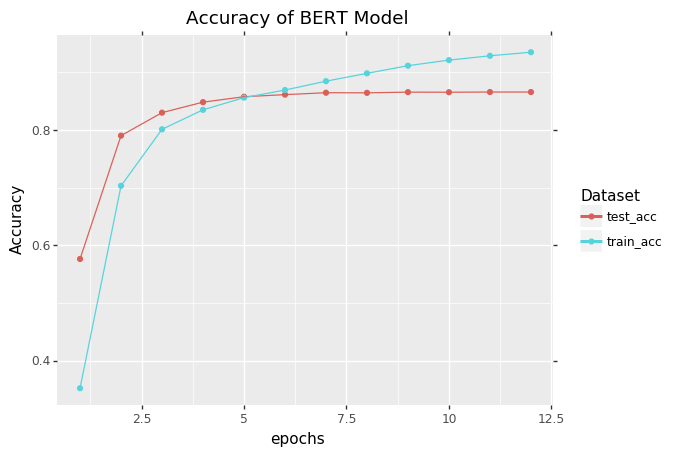

<ggplot: (-9223363269873304032)>

In [86]:
(ggplot(History) + 
 geom_point(aes(x = 'epochs', y = 'Accuracy', color = 'Dataset')) + 
 geom_line(aes(x = 'epochs', y = 'Accuracy', color = 'Dataset')) + 
 labs(title = "Accuracy of BERT Model"))

# Save model and Prediction

In [0]:
predictor = ktrain.get_predictor(learner.model, preproc)
predictor.save('/tmp/predictors')

## Make prediction with model
Here are some prediction examples. 

It is from the artifacial sample data prediction result, that we decide to keep preposition in the sentence.

In [0]:
import numpy as np

def mypredict(model, data):
  result = []
  text = model.preproc.preprocess(data)
  preds = model.model.predict(text)
  for pred in preds:
    result.append(str(np.argmax(pred)))
  return result


In [52]:
print(mypredict(predictor, data[10010:10020]))
print(label[10010:10020])

['71', '53', '71', '52', '55', '73', '42', '55', '62', '42']
['71', '53', '71', '52', '55', '70', '42', '55', '62', '42']


In [0]:
mypredict(predictor, data = ["human slip and hurt ankle"])

['42']

In [0]:
mypredict(predictor, data = ["was cut pallet at work with circular saw when glove caught blade scrape top finger  "])

['62']

Here are examples showing that preposition affect the prediction result

In [56]:
mypredict(predictor, data = ["human fall flat on second floor"])

['42']

In [57]:
mypredict(predictor, data = ["human fall flat from second floor"])

['43']

## Reload model and predict
If we have saved the predictors, we can reload it and make a prediction.

In [0]:
# reload the predictor saved
reloaded_predictor = ktrain.load_predictor('/content/predictors' )

In [0]:
# make a prediction to verify the model still works
import numpy as np

# The text data should be wrapped in a list.
def mypredict(model, data):
  result = []
  text = model.preproc.preprocess(data)
  preds = model.model.predict(text)
  for pred in preds:
    result.append(str(np.argmax(pred)))
  return result
  
print(mypredict(reloaded_predictor, data[10010:10020]))


['71', '53', '62', '62', '11', '62', '55', '63', '62', '55']


# Model Structure Visulization

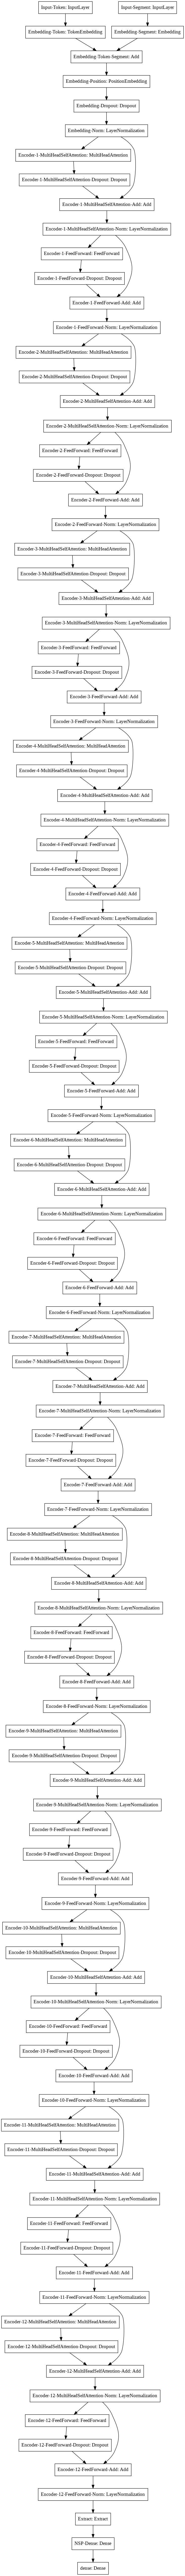

In [78]:
from tensorflow.keras.utils import plot_model
plot_model(learner.model)

In [84]:
learner.model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input-Token (InputLayer)        [(None, 30)]         0                                            
__________________________________________________________________________________________________
Input-Segment (InputLayer)      [(None, 30)]         0                                            
__________________________________________________________________________________________________
Embedding-Token (TokenEmbedding [(None, 30, 768), (3 23440896    Input-Token[0][0]                
__________________________________________________________________________________________________
Embedding-Segment (Embedding)   (None, 30, 768)      1536        Input-Segment[0][0]              
____________________________________________________________________________________________